# "Quantium Virtual Internship - Retail Strategy and Analytics - Task 2"
# by Jolomi Tosanwumi.

## *Coded in Python.*

## 1.0 Importing useful libraries

In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy as sp

%matplotlib inline

## 2.0 Loading in the datasets

In [2]:
df = pd.read_csv("cleaned_transaction_customer_data.csv") # loading in the cleaned dataset
chips_df = df.copy() # making a copy of df as our working df
chips_df.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


### 3.0 Summary statistics of the data

In [3]:
chips_df.drop("Unnamed: 0", axis=1, inplace=True) # dropping "Unnamed: 0" column
print(f"shape of data is {chips_df.shape}")
chips_df.info()

shape of data is (246740, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              246740 non-null  object 
 1   STORE_NBR         246740 non-null  int64  
 2   LYLTY_CARD_NBR    246740 non-null  int64  
 3   TXN_ID            246740 non-null  int64  
 4   PROD_NBR          246740 non-null  int64  
 5   PROD_NAME         246740 non-null  object 
 6   PROD_QTY          246740 non-null  int64  
 7   TOT_SALES         246740 non-null  float64
 8   is_chip           246740 non-null  int64  
 9   PACK_SIZE         246740 non-null  int64  
 10  BRAND_NAME        246740 non-null  object 
 11  LIFESTAGE         246740 non-null  object 
 12  PREMIUM_CUSTOMER  246740 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 24.5+ MB


In [4]:
assert chips_df.isnull().sum().sum() == 0 # confirming that there are no Nan values

### 4.0 Adding a new month ID column in the data with the format yyyymm

In [5]:
chips_df['month_ID'] = pd.to_datetime(chips_df['DATE']).apply(lambda date: date.strftime("%Y-%m"))

In [6]:
chips_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,month_ID
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,175,NCC,YOUNG SINGLES/COUPLES,Premium,2018-10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2019-05
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,2019-05
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,2018-08
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,2018-08


### 5.0 Next, we define the measure calculations to use during the analysis. For each store and month we will calculate total sales, number of customers, transactions per customer, chips per customer and the average price per unit.

In [7]:
store_month_groups = chips_df.groupby(["STORE_NBR", "month_ID"])
measureOverTime = pd.DataFrame()
measureOverTime['totSales'] = store_month_groups['TOT_SALES'].sum()
measureOverTime['nCustomers'] = store_month_groups['LYLTY_CARD_NBR'].apply(lambda cus: len(cus.unique()))
measureOverTime['nTxnPerCust'] = store_month_groups.apply(lambda group: len(group['TXN_ID'].unique()) / 
                                                          len(group['LYLTY_CARD_NBR'].unique()))
measureOverTime['nChipsPerTxn'] = store_month_groups.apply(lambda group: group['PROD_QTY'].sum() / 
                                                          len(group['TXN_ID'].unique()))
measureOverTime['avgPricePerUnit'] = store_month_groups.apply(lambda group: group['TOT_SALES'].sum() / 
                                                          group['PROD_QTY'].sum())
measureOverTime.head()

totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
STORE_NBR month_ID                                                    
1         2018-07      188.9          47     1.042553      1.183673   
          2018-08      168.4          41     1.000000      1.268293   
          2018-09      268.1          57     1.035088      1.203390   
          2018-10      175.4          39     1.025641      1.275000   
          2018-11      184.8          44     1.022727      1.222222   

                    avgPricePerUnit  
STORE_NBR month_ID                   
1         2018-07          3.256897  
          2018-08          3.238462  
          2018-09          3.776056  
          2018-10          3.439216  
          2018-11          3.360000

### 6.0 Filtering to stores with full observation periods

In [8]:
store_nbr = measureOverTime.groupby(level='STORE_NBR')['totSales'].count()
storesWithFullObs = measureOverTime.loc[list(store_nbr[store_nbr == 12].index)]
print(f"Number of stores without full observation is {store_nbr.shape[0] - store_nbr[store_nbr == 12].shape[0]}")
print(f"Number of stores with full observation is {store_nbr[store_nbr == 12].shape[0]}")
storesWithFullObs.head()

Number of stores without full observation is 12
Number of stores with full observation is 259


totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
STORE_NBR month_ID                                                    
1         2018-07      188.9          47     1.042553      1.183673   
          2018-08      168.4          41     1.000000      1.268293   
          2018-09      268.1          57     1.035088      1.203390   
          2018-10      175.4          39     1.025641      1.275000   
          2018-11      184.8          44     1.022727      1.222222   

                    avgPricePerUnit  
STORE_NBR month_ID                   
1         2018-07          3.256897  
          2018-08          3.238462  
          2018-09          3.776056  
          2018-10          3.439216  
          2018-11          3.360000

### 7.0 Filtering to the pre-trial period

In [9]:
trial_start_date = "2019-02"
is_pre_trial = storesWithFullObs.index.to_series().apply(lambda ind: ind[1] < trial_start_date)
preTrialMeasures = storesWithFullObs.loc[list(is_pre_trial[is_pre_trial == True].index)]
preTrialMeasures.head()

totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
STORE_NBR month_ID                                                    
1         2018-07      188.9          47     1.042553      1.183673   
          2018-08      168.4          41     1.000000      1.268293   
          2018-09      268.1          57     1.035088      1.203390   
          2018-10      175.4          39     1.025641      1.275000   
          2018-11      184.8          44     1.022727      1.222222   

                    avgPricePerUnit  
STORE_NBR month_ID                   
1         2018-07          3.256897  
          2018-08          3.238462  
          2018-09          3.776056  
          2018-10          3.439216  
          2018-11          3.360000

In [10]:
n_pre_trial_months = 12 + datetime.datetime.strptime(trial_start_date, "%Y-%m").month - datetime.datetime.strptime(
    chips_df['month_ID'].min(), "%Y-%m").month
print(f"n_pre_trial_months is {n_pre_trial_months}")

# confirming that the number of pre-trial months multiplied by the number of stores with full observations equals the number of
# preTrialMeasures
assert n_pre_trial_months*store_nbr[store_nbr == 12].shape[0] == preTrialMeasures.shape[0] 

n_pre_trial_months is 7


### 8.0 Defining a function to calculate correlation for a measure, looping through each control store.

In [11]:
def calculateCorrelation(d_f, metric, trial_store_number):
    res = d_f.groupby(level='STORE_NBR').apply(lambda x: d_f.loc[trial_store_number, metric].corr(x[metric]))
    res.name = metric
    return res

In [12]:
assert round(preTrialMeasures.loc[1]['totSales'].corr(preTrialMeasures.loc[77]['totSales']), 6) == round(calculateCorrelation(
    preTrialMeasures, 'totSales', 77)[1], 6)

assert round(calculateCorrelation(preTrialMeasures, 'totSales', 77)[77], 6) == 1

### 9.0 Defining a function to calculate magnitude distance for a measure, looping through each control store.

In [13]:
def calculateMagnitudeDistance(d_f, metric, trial_store):
    dist = d_f.groupby(level='STORE_NBR').apply(lambda x: (d_f.loc[trial_store, metric] - x[metric]).abs())
    min_max_dist = 1 - (dist - dist.min())/(dist.max() - dist.min())
    return min_max_dist.groupby(level=0).mean()

In [14]:
assert calculateMagnitudeDistance(preTrialMeasures, 'totSales', 77)[77] == 1

### 10.0 Defining a function to return the average similarity score for the measures of each control store.

In [15]:
def get_control_store(d_f, trial_store, metrics, corr_weight=0.5):
    metric_scores = []
    
    for metric in metrics:
        metric_scores.append(corr_weight*calculateCorrelation(d_f, metric, trial_store) +
        (1-corr_weight)*calculateMagnitudeDistance(d_f, metric, trial_store))

    return pd.DataFrame(metric_scores).mean()

## 11.0.0 Trial Store 77

### 11.0.1 Finding the most similar store to trial store 77

In [16]:
# getting the average similarity score for trial score 77
score_Control77 = get_control_store(preTrialMeasures, 77, ('totSales', 'nCustomers')).sort_values(ascending=False)
control_store77 = score_Control77.index[1]

print(f"Most similar store to store number 77 is store number {control_store77} " + 
      f"with a control score of {score_Control77.iloc[1]}")

Most similar store to store number 77 is store number 233 with a control score of 0.9793850839952927


### 12.0 Defining a function to plot the similarity plot of a trial store and its control store

In [17]:
def similarity_plot(d_f, trial_store, control_store, metric):
    plt.plot(d_f.loc[trial_store, metric], label='trial store '+str(trial_store))
    plt.plot(d_f.loc[control_store, metric], label='control store '+str(control_store))
    plt.xlabel('Months')
    plt.ylabel(metric)
    plt.legend()
    plt.title('Monthly '+metric+' for trial store '+str(trial_store)+' vs its control store '+str(control_store))
    plt.grid()

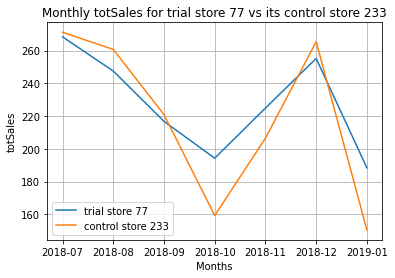

In [18]:
similarity_plot(preTrialMeasures, 77, control_store77, 'totSales')

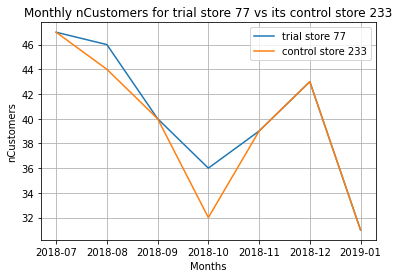

In [19]:
similarity_plot(preTrialMeasures, 77, control_store77, 'nCustomers')

### 13.0 Defining a function to return the scaling factor of a control store metric

In [20]:
def scalingFactorForControl(pre_trial_df, trial_store, control_store, metric):
    return pre_trial_df.loc[trial_store, metric].sum() / pre_trial_df.loc[control_store, metric].sum()

### 14.0 Defining a function to return the scaled control store metric

In [21]:
def scaledControl(full_df, pre_trial_df, trial_store, control_store, metric):
    return full_df.loc[control_store, metric] * scalingFactorForControl(pre_trial_df, trial_store, control_store, metric)

### 15.0 Defining a function to return the percentage difference of a trial store and a control store using the formula: $$percentageDiff = \frac{m - n}{\frac{m + n}{2}}$$

In [22]:
def percentageDiff(full_df, pre_trial_df, trial_store, control_store, metric):
    # scale
    scaled_control = scaledControl(full_df, pre_trial_df, trial_store, control_store, metric)
    
    # percentage diff
    return 2 * (full_df.loc[trial_store, metric] - scaled_control) / (scaled_control + full_df.loc[trial_store, metric])
    

### 11.1.0 Total Sales for Trial Store 77

In [23]:
percentageDiff77_totSales = percentageDiff(storesWithFullObs, preTrialMeasures, 77, control_store77, 'totSales')

### 11.1.1 Since we are testing a null hypothesis of there being 0 difference between trial and control stores; $\mu_{0} = 0$ therefore, the t-statistics will simply be: $$tstat = \frac{x}{\sigma_{s}}$$

In [24]:
stdDev77_totSales = percentageDiff77_totSales[: '2019-01'].std(ddof=1)
t_values77_totSales = (percentageDiff77_totSales['2019-02': '2019-04']) / stdDev77_totSales
t_values77_totSales

month_ID
2019-02   -0.701726
2019-03    2.632302
2019-04    4.590662
Name: totSales, dtype: float64

In [25]:
alpha = 0.9 # this will make the lower and upper bounds of the confident interval to be 0.05 and 0.95 respectively
degree_of_freedom = n_pre_trial_months - 1

### 11.1.2 Calculating the upper and lower bounds of the confident interval of trial store 77 for totSales

In [26]:
scaledControlSales77_totSales = scaledControl(storesWithFullObs, preTrialMeasures, 77, control_store77, 'totSales')

confidence_interval77_totSales = pd.DataFrame()

confidence_interval77_totSales['upper_bound'] = sp.stats.t.ppf((1+alpha)/2, degree_of_freedom) * stdDev77_totSales * \
(scaledControlSales77_totSales+storesWithFullObs.loc[77, 'totSales']) / 2 + scaledControlSales77_totSales

confidence_interval77_totSales['lower_bound'] = sp.stats.t.ppf((1-alpha)/2, degree_of_freedom) * stdDev77_totSales * \
(scaledControlSales77_totSales+storesWithFullObs.loc[77, 'totSales']) / 2 + scaledControlSales77_totSales

In [27]:
confidence_interval77_totSales.head()

,upper_bound,lower_bound
month_ID,,
2018-07,343.740398,220.221283
2018-08,329.252691,212.874190
2018-09,279.782037,179.580557
2018-10,206.021448,125.243654
2018-11,264.038430,165.379295


### 16.0.0 Defining a function to nicely plot the trial, control, upper and lower confident interval bounds for a particular metric.

In [28]:
def trial_months_plot(full_df, trial_store, control_store, metric, confidence_interval, trial_start='2019-02', 
                      trial_end='2019-04'):
    fig = plt.figure(figsize=(8, 4))
    
    plt.plot(full_df.loc[trial_store, metric], label=f'trial store {trial_store}', c='r')
    plt.plot(full_df.loc[control_store, metric], label=f'control store {control_store}', c='b')
    
    plt.plot(confidence_interval['upper_bound'], '--', c='g', label='upper confidence interval 95%')
    plt.plot(confidence_interval['lower_bound'], '--', c='y', label='lower confidence interval 5%')
    
    plt.title(f"Trial Store {trial_store} {metric} By Month")
    plt.xlabel("Month")
    plt.xticks(rotation=90)
    plt.ylabel(metric)
    
    plt.grid()
    ax = plt.gca()
    
    y_min, y_max = ax.get_ylim()
    
    plt.fill_between(full_df.loc[trial_store, metric][trial_start: trial_end].index, 
                     y_min, y_max, alpha=0.1, label='trial peroid')
    
    plt.legend(bbox_to_anchor=(1.45, 0), loc='lower right')

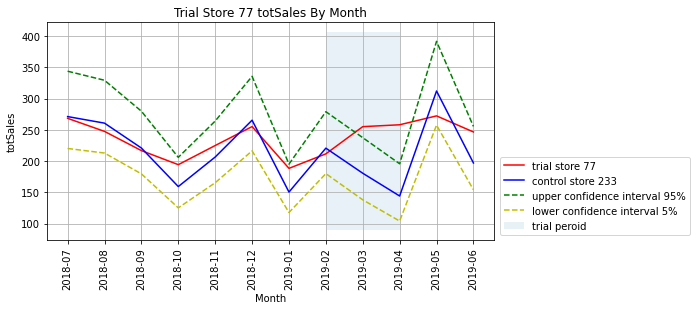

In [29]:
trial_months_plot(storesWithFullObs, 77, control_store77, 'totSales', confidence_interval77_totSales)

### The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

### 11.2.0 Number of Customers for Trial Store 77

In [30]:
percentageDiff77_nCustomers = percentageDiff(storesWithFullObs, preTrialMeasures, 77, control_store77, 'nCustomers')

### 11.2.1 Calculating the standard deviation and t-statistics of nCustomers metric of trial store 77

In [31]:
stdDev77_nCustomers = percentageDiff77_nCustomers[: '2019-01'].std(ddof=1)
t_values77_nCustomers = percentageDiff77_nCustomers['2019-02': '2019-04'] / stdDev77_nCustomers
t_values77_nCustomers

month_ID
2019-02    -1.566373
2019-03     5.583271
2019-04    11.603843
Name: nCustomers, dtype: float64

### 11.2.2 Calculating the upper and lower bounds of the confident interval of trial store 77 for nCustomers

In [32]:
scaledControlSales77_nCustomers = scaledControl(storesWithFullObs, preTrialMeasures, 77, control_store77, 'nCustomers')

confidence_interval77_nCustomers = pd.DataFrame()

confidence_interval77_nCustomers['upper_bound'] = sp.stats.t.ppf((1+alpha)/2, degree_of_freedom) * stdDev77_nCustomers * \
(scaledControlSales77_nCustomers+storesWithFullObs.loc[77, 'nCustomers']) / 2 + scaledControlSales77_nCustomers

confidence_interval77_nCustomers['lower_bound'] = sp.stats.t.ppf((1-alpha)/2, degree_of_freedom) * stdDev77_nCustomers * \
(scaledControlSales77_nCustomers+storesWithFullObs.loc[77, 'nCustomers']) / 2 + scaledControlSales77_nCustomers

In [33]:
confidence_interval77_nCustomers.head()

,upper_bound,lower_bound
month_ID,,
2018-07,52.163309,43.880170
2018-08,48.920907,40.992137
2018-09,44.394305,37.344825
2018-10,35.689786,29.701518
2018-11,43.284448,36.411205


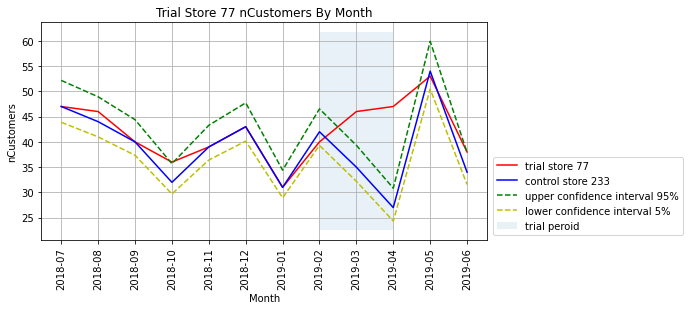

In [34]:
trial_months_plot(storesWithFullObs, 77, control_store77, 'nCustomers', confidence_interval77_nCustomers)

### The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

## Trial Store 86

### Repeating steps 11.0.0 to 11.2.2 for trial store 86

In [35]:
score_Control86 = get_control_store(preTrialMeasures, 86, ('totSales', 'nCustomers')).sort_values(ascending=False)
control_store86 = score_Control86.index[1]

print(f"Most similar store to store number 86 is store number {control_store86} " + 
      f"with a control score of {score_Control86.iloc[1]}")

Most similar store to store number 86 is store number 155 with a control score of 0.9094000810621445


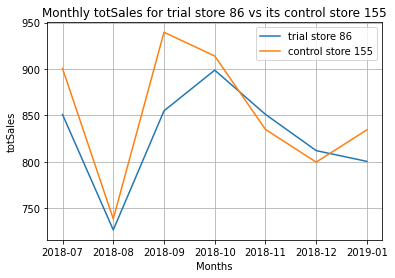

In [36]:
similarity_plot(preTrialMeasures, 86, control_store86, 'totSales')

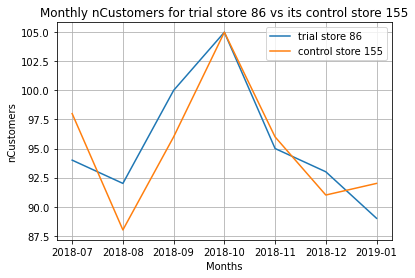

In [37]:
similarity_plot(preTrialMeasures, 86, control_store86, 'nCustomers')

### Total Sales for Trial Store 86

In [38]:
percentageDiff86_totSales = percentageDiff(storesWithFullObs, preTrialMeasures, 86, control_store86, 'totSales')

In [39]:
stdDev86_totSales = percentageDiff86_totSales[: '2019-01'].std(ddof=1)
t_values86_totSales = percentageDiff86_totSales['2019-02': '2019-04'] / stdDev86_totSales
t_values86_totSales

month_ID
2019-02    1.334358
2019-03    5.855181
2019-04    0.813358
Name: totSales, dtype: float64

In [40]:
scaledControlSales86_totSales = scaledControl(storesWithFullObs, preTrialMeasures, 86, control_store86, 'totSales')

confidence_interval86_totSales = pd.DataFrame()

confidence_interval86_totSales['upper_bound'] = sp.stats.t.ppf((1+alpha)/2, degree_of_freedom) * stdDev86_totSales * \
(scaledControlSales86_totSales+storesWithFullObs.loc[86, 'totSales']) / 2 + scaledControlSales86_totSales

confidence_interval86_totSales['lower_bound'] = sp.stats.t.ppf((1-alpha)/2, degree_of_freedom) * stdDev86_totSales * \
(scaledControlSales86_totSales+storesWithFullObs.loc[86, 'totSales']) / 2 + scaledControlSales86_totSales

In [41]:
confidence_interval86_totSales.head()

,upper_bound,lower_bound
month_ID,,
2018-07,943.139674,807.715664
2018-08,774.723231,661.382519
2018-09,982.693344,843.981846
2018-10,958.550763,818.355498
2018-11,876.880103,746.442356


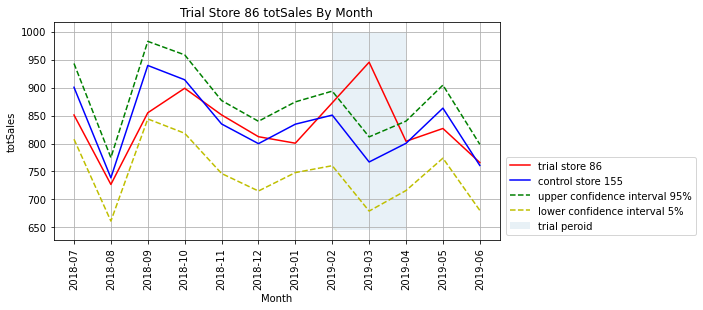

In [42]:
trial_months_plot(storesWithFullObs, 86, control_store86, 'totSales', confidence_interval86_totSales)

### The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months. The significant increase in sales in the March could signify something about the customers behaviour. We will now check for number of customers to confirm what happened there.

### Number of Customers for Trial Store 86

In [43]:
percentageDiff86_nCustomers = percentageDiff(storesWithFullObs, preTrialMeasures, 86, control_store86, 'nCustomers')

In [44]:
stdDev86_nCustomers = percentageDiff86_nCustomers[: '2019-01'].std(ddof=1)
t_values86_nCustomers = percentageDiff86_nCustomers['2019-02': '2019-04'] / stdDev86_nCustomers
t_values86_nCustomers

month_ID
2019-02    3.778942
2019-03    4.918048
2019-04    1.743207
Name: nCustomers, dtype: float64

In [45]:
scaledControlSales86_nCustomers = scaledControl(storesWithFullObs, preTrialMeasures, 86, control_store86, 'nCustomers')

confidence_interval86_nCustomers = pd.DataFrame()

confidence_interval86_nCustomers['upper_bound'] = sp.stats.t.ppf((1+alpha)/2, degree_of_freedom) * stdDev86_nCustomers * \
(scaledControlSales86_nCustomers+storesWithFullObs.loc[86, 'nCustomers']) / 2 + scaledControlSales86_nCustomers

confidence_interval86_nCustomers['lower_bound'] = sp.stats.t.ppf((1-alpha)/2, degree_of_freedom) * stdDev86_nCustomers * \
(scaledControlSales86_nCustomers+storesWithFullObs.loc[86, 'nCustomers']) / 2 + scaledControlSales86_nCustomers

In [46]:
confidence_interval86_nCustomers.head()

,upper_bound,lower_bound
month_ID,,
2018-07,104.671768,91.916821
2018-08,94.242760,82.285769
2018-09,102.798223,89.778353
2018-10,112.290459,98.340171
2018-11,102.632398,89.944179


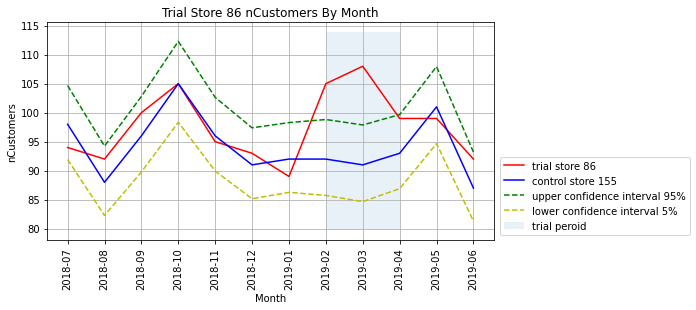

In [47]:
trial_months_plot(storesWithFullObs, 86, control_store86, 'nCustomers', confidence_interval86_nCustomers)

### The result shows that the number of customers is significantly higher in two of the three trial months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

## Trial Store 88

### Repeating steps 11.0.0 to 11.2.2 for trial store 88

In [48]:
score_Control88 = get_control_store(preTrialMeasures, 88, ('totSales', 'nCustomers')).sort_values(ascending=False)
control_store88 = score_Control88.index[1]

print(f"Most similar store to store number 88 is store number {control_store88} " + 
      f"with a control score of {score_Control88.iloc[1]}")

Most similar store to store number 88 is store number 237 with a control score of 0.7487474690324492


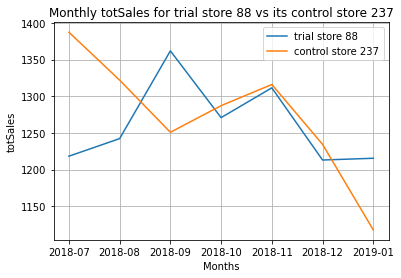

In [49]:
similarity_plot(preTrialMeasures, 88, control_store88, 'totSales')

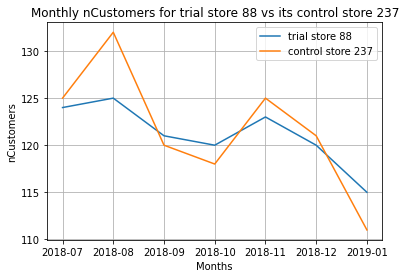

In [50]:
similarity_plot(preTrialMeasures, 88, control_store88, 'nCustomers')

### Total Sales for Trial Store 88

In [51]:
percentageDiff88_totSales = percentageDiff(storesWithFullObs, preTrialMeasures, 88, control_store88, 'totSales')

In [52]:
stdDev88_totSales = percentageDiff88_totSales[: '2019-01'].std(ddof=1)
t_values88_totSales = percentageDiff88_totSales['2019-02': '2019-04'] / stdDev88_totSales
t_values88_totSales

month_ID
2019-02    0.384278
2019-03    2.987611
2019-04    1.854078
Name: totSales, dtype: float64

In [53]:
scaledControlSales88_totSales = scaledControl(storesWithFullObs, preTrialMeasures, 88, control_store88, 'totSales')

confidence_interval88_totSales = pd.DataFrame()

confidence_interval88_totSales['upper_bound'] = sp.stats.t.ppf((1+alpha)/2, degree_of_freedom) * stdDev88_totSales * \
(scaledControlSales88_totSales+storesWithFullObs.loc[88, 'totSales']) / 2 + scaledControlSales88_totSales

confidence_interval88_totSales['lower_bound'] = sp.stats.t.ppf((1-alpha)/2, degree_of_freedom) * stdDev88_totSales * \
(scaledControlSales88_totSales+storesWithFullObs.loc[88, 'totSales']) / 2 + scaledControlSales88_totSales

In [54]:
confidence_interval88_totSales.head()

,upper_bound,lower_bound
month_ID,,
2018-07,1566.643822,1182.144225
2018-08,1498.928804,1120.464880
2018-09,1432.130280,1046.376128
2018-10,1464.014133,1086.422067
2018-11,1497.781223,1109.921394


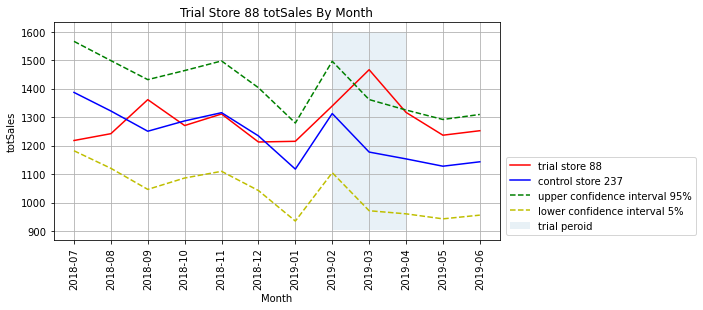

In [55]:
trial_months_plot(storesWithFullObs, 88, control_store88, 'totSales', confidence_interval88_totSales)

### The results show that the trial in store 88 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months. The significant increase in sales in the March could signify something about the customers behaviour. We will now check for number of customers to confirm what happened there.

### Number of Customers for Trial Store 88

In [56]:
percentageDiff88_nCustomers = percentageDiff(storesWithFullObs, preTrialMeasures, 88, control_store88, 'nCustomers')

In [57]:
stdDev88_nCustomers = percentageDiff88_nCustomers[: '2019-01'].std(ddof=1)
t_values88_nCustomers = percentageDiff88_nCustomers['2019-02': '2019-04'] / stdDev88_nCustomers
t_values88_nCustomers

month_ID
2019-02    1.039466
2019-03    4.959350
2019-04    1.061786
Name: nCustomers, dtype: float64

In [58]:
scaledControlSales88_nCustomers = scaledControl(storesWithFullObs, preTrialMeasures, 88, control_store88, 'nCustomers')

confidence_interval88_nCustomers = pd.DataFrame()

confidence_interval88_nCustomers['upper_bound'] = sp.stats.t.ppf((1+alpha)/2, degree_of_freedom) * stdDev88_nCustomers * \
(scaledControlSales88_nCustomers+storesWithFullObs.loc[88, 'nCustomers']) / 2 + scaledControlSales88_nCustomers

confidence_interval88_nCustomers['lower_bound'] = sp.stats.t.ppf((1-alpha)/2, degree_of_freedom) * stdDev88_nCustomers * \
(scaledControlSales88_nCustomers+storesWithFullObs.loc[88, 'nCustomers']) / 2 + scaledControlSales88_nCustomers

In [59]:
confidence_interval88_nCustomers.head()

,upper_bound,lower_bound
month_ID,,
2018-07,131.286329,117.539962
2018-08,138.473903,124.286660
2018-09,126.089106,112.784133
2018-10,124.015751,110.876268
2018-11,131.258661,117.567630


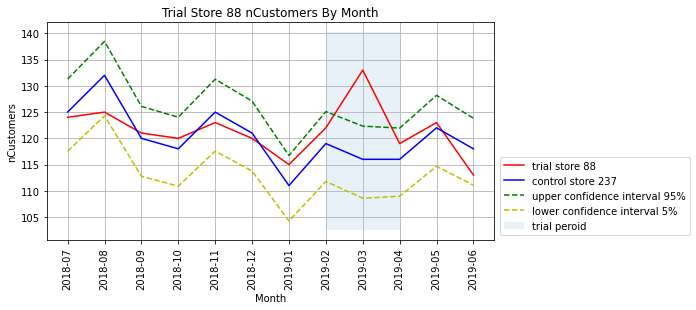

In [60]:
trial_months_plot(storesWithFullObs, 88, control_store88, 'nCustomers', confidence_interval88_nCustomers)

### The results show that the trial in store 88 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months. The significant increase in number of customers and sales in the March could signify something special about the month of March. We should check with the Category Manager if there were special events or deals in the trial store that may have resulted in higher number of customers and sales.

# Conclusion:

- We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
- The results for trial store 77 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial stores 86 and 88. We can check with the client if the implementation of the trial was different in trial store 86 and 88 but overall, the trial shows a significant increase in sales for trial store 86.